In [2]:
import os
import sys
import pandas as pd
sys.path.append(sys.path[0][:-len("REPORT")])


In [3]:
from src.LSS_LRTA_star.validating import simple_test,toy_test, base_test, super_test, TestLSSLRTAstar
from src.LSS_LRTA_star.lss_lrta import lss_lrta_star, manhattan_distance
from src.LSS_LRTA_star.search import SearchTreePQS
from src.statistics_tools.statistics_methods import Statistic, FactoryStatistics

In [4]:
!pip install matplotlib_inline

In [5]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

In [5]:
res = simple_test(lss_lrta_star, manhattan_distance, SearchTreePQS, 13, view_range=2, task=1, map_type=1)

Obstacle! Length: 7. Nodes created: 36. Number of expansions: 13.
Obstacle! Length: 5. Nodes created: 38. Number of expansions: 13.
Obstacle! Length: 6. Nodes created: 30. Number of expansions: 13.
Obstacle! Length: 3. Nodes created: 37. Number of expansions: 13.
Obstacle! Length: 3. Nodes created: 28. Number of expansions: 13.
Success! Length: 5. Nodes created: 22. Number of expansions: 13.
Obstacle! Length: 7. Nodes created: 36. Number of expansions: 13.
Obstacle! Length: 3. Nodes created: 27. Number of expansions: 13.
Obstacle! Length: 5. Nodes created: 35. Number of expansions: 13.
Obstacle! Length: 3. Nodes created: 36. Number of expansions: 13.
Obstacle! Length: 3. Nodes created: 28. Number of expansions: 13.
Obstacle! Length: 3. Nodes created: 22. Number of expansions: 13.
Obstacle! Length: 10. Nodes created: 28. Number of expansions: 13.
Obstacle! Length: 3. Nodes created: 23. Number of expansions: 13.
Obstacle! Length: 4. Nodes created: 32. Number of expansions: 12.
Obstacle! 

## Random Obstacles

In [6]:
max_count_map = 100
lookaheads = [l for l in range(3, 50, 2)]
statistics = Statistic().get_name_of_statistics()
random_obstacles_results = pd.DataFrame(columns=statistics,index=lookaheads)

for lookahead in lookaheads:
    factory_statistics = FactoryStatistics.load_stats(
        name_file=f'LSS_LRTA_star_random_obstacles_lookahead_eq_{lookahead}_view_range_{1}', 
        path_to_file='../src/statistics_tools/calcutated_stats/random_obstacles')
    random_obstacles_results.loc[lookahead] = factory_statistics.get_DataFrame().iloc[:max_count_map * 20].mean()

# force to nanosec?
random_obstacles_results['Search_time'] *= 10e4
random_obstacles_results['Search_time_per_search'] *= 10e4

In [24]:
factory_statistics = FactoryStatistics.load_stats(
    name_file=f'D_Lite_star_random_obstacles_view_range_1_max_count_50', 
    path_to_file='../src/statistics_tools/calcutated_stats/random_obstacles')
random_obstacles_result = factory_statistics.get_DataFrame()

random_obstacles_result = random_obstacles_result[random_obstacles_result['Cell_expansions'] != 0]
random_obstacles_result.mean()

Cell_expansions                 13994.319149
Searchesc                         228.579787
Trajectory_length                 235.005319
Trajectory_length_per_search        1.027592
Search_time                      5089.105028
Search_time_per_search             18.262040
Search_time_per_action                   NaN
Optimal_length                    217.420213
dtype: float64

In [26]:
random_obstacles_results[statistics[:-2]]

,Cell_expansions,Searchesc,Trajectory_length,Trajectory_length_per_search,Search_time,Search_time_per_search
3,459.928,153.646,353.412,2.32485,1604.27,10.4073
5,523.254,105.064,339.465,3.26644,1465.42,13.9874
7,598.228,85.9735,331.017,3.89414,1536.2,17.6673
9,677.404,75.9405,323.562,4.31405,1689.31,21.875
11,768.864,70.7575,320.306,4.5817,1893.14,26.3497
13,866.787,67.757,318.073,4.74907,2128.12,30.9734
15,966.586,65.769,315.878,4.86063,2404.06,35.389
17,1066.94,64.3485,313.801,4.94035,2696.79,40.6292
19,1172.78,63.5895,312.877,4.98549,3009.56,45.8566
21,1280.56,63.1315,312.417,5.01431,3268.32,50.2094


In [12]:
path_to_docs = '../docs/'

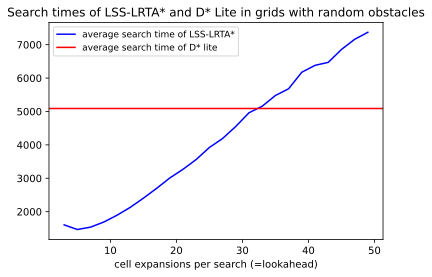

In [25]:
search_time_D_star_lite = random_obstacles_result['Search_time'].mean()

plt.plot(lookaheads, random_obstacles_results['Search_time'],
         color = 'blue',
         label = 'average search time of LSS-LRTA*')
plt.axhline(y=search_time_D_star_lite, linestyle='-',
         color = 'red',
         label='average search time of D* lite')
plt.xlabel('cell expansions per search (=lookahead)')
plt.title('Search times of LSS-LRTA* and D* Lite in grids with random obstacles')
plt.legend(fontsize=9)
plt.savefig(path_to_docs + 'search_times_for_random_obstacles.png')
plt.show()

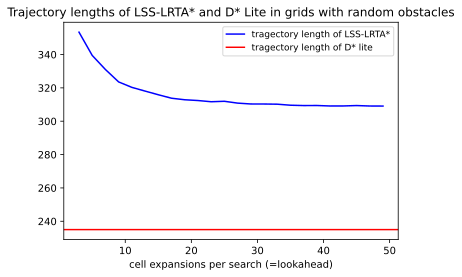

In [22]:
trajectory_length_D_star_lite = random_obstacles_result['Trajectory_length'].mean()

plt.plot(lookaheads, random_obstacles_results['Trajectory_length'],
        color='blue',
        label = 'tragectory length of LSS-LRTA*')
plt.axhline(y=trajectory_length_D_star_lite, linestyle='-',
        color='red',
        label='tragectory length of D* lite')
plt.xlabel('cell expansions per search (=lookahead)')
plt.title('Trajectory lengths of LSS-LRTA* and D* Lite in grids with random obstacles')
plt.legend(fontsize=9)
plt.savefig(path_to_docs + 'trajectory_length_for_random_obstacles.png')
plt.show()

## Mazes

In [30]:
max_count_map = 25
lookaheads = [l for l in range(3, 50, 2) if l!=43]
statistics = Statistic().get_name_of_statistics()
mazes_results = pd.DataFrame(columns=statistics,index=lookaheads)

for lookahead in lookaheads:
    factory_statistics = FactoryStatistics.load_stats(
        name_file=f'LSS_LRTA_star_mazes_lookahead_eq_{lookahead}_view_range_{1}', 
        path_to_file='../src/statistics_tools/calcutated_stats/mazes')
    mazes_results.loc[lookahead] = factory_statistics.get_DataFrame().mean()

# force to nanosec?
mazes_results['Search_time'] *= 10e4
mazes_results['Search_time_per_search'] *= 10e4

In [58]:
factory_statistics = FactoryStatistics.load_stats(
    name_file=f'D_Lite_star_random_obstacles_view_range_1_max_count_3', 
    path_to_file='../src/statistics_tools/calcutated_stats/random_obstacles')
random_obstacles_result = factory_statistics.get_DataFrame()

mazes_result = random_obstacles_result[random_obstacles_result['Cell_expansions'] != 0][statistics[:-2]]
mazes_result

,Cell_expansions,Searchesc,Trajectory_length,Trajectory_length_per_search,Search_time,Search_time_per_search
0,6137,154,154,1.000000,2595.544338,16.854184
1,3001,118,124,1.042373,1602.437019,13.579975
2,18497,312,315,1.009615,8001.527786,25.645922
3,2774,116,116,1.000000,3751.103401,32.337098
4,24969,329,332,1.009119,10424.647570,31.685859
6,29192,360,363,1.008333,14593.709946,40.538083
7,281,47,48,1.021277,867.910147,18.466173
8,29192,360,363,1.008333,12920.646667,35.890685


In [44]:
mazes_results[statistics[:-2]]

,Cell_expansions,Searchesc,Trajectory_length,Trajectory_length_per_search,Search_time,Search_time_per_search
3,545749,181917,408869,2.24134,1.82724e+06,10.522
5,314357,62871.8,205262,3.25222,879072,13.4069
7,193487,27641.8,116629,4.1341,509763,17.9702
9,201813,22424.7,114469,4.77469,501985,21.8542
11,234788,21346,125742,5.64443,577608,29.1586
13,219158,16860.1,111782,6.04254,526459,31.286
15,188299,12556.6,88911.6,6.73715,448704,35.6414
17,181441,10676.4,83379.4,6.76851,433851,40.7746
19,110381,5814.32,47410,7.08594,262542,44.803
21,352603,16797,150495,7.78393,831898,50.0264


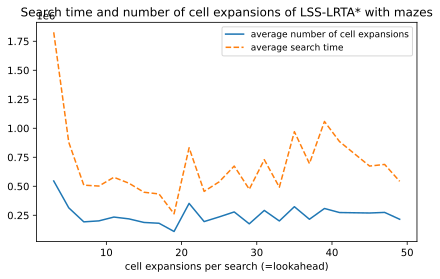

In [32]:
plt.plot(lookaheads, mazes_results['Cell_expansions'],
         label = 'average number of cell expansions')
plt.plot(lookaheads, mazes_results['Search_time'],
         linestyle='--',
         label = 'average search time')
plt.xlabel('cell expansions per search (=lookahead)')
plt.title('Search time and number of cell expansions of LSS-LRTA* with mazes')
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

In [33]:
path_to_docs = '../docs/'

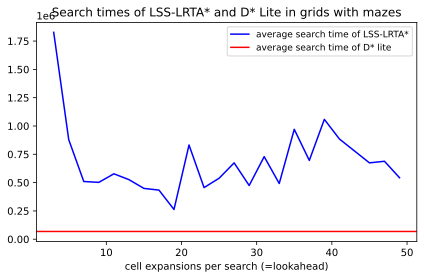

In [47]:
# put real value!!!
search_time_D_star_lite = mazes_result['Search_time'].mean() * 10

plt.plot(lookaheads, mazes_results['Search_time'],
         color = 'blue',
         label = 'average search time of LSS-LRTA*')
plt.axhline(y=search_time_D_star_lite, linestyle='-',
         color = 'red',
         label='average search time of D* lite')
plt.xlabel('cell expansions per search (=lookahead)')
plt.title('Search times of LSS-LRTA* and D* Lite in grids with mazes')
plt.legend(fontsize=9)
plt.savefig(path_to_docs + 'search_times_for_mazes.png')
plt.tight_layout()
plt.show()

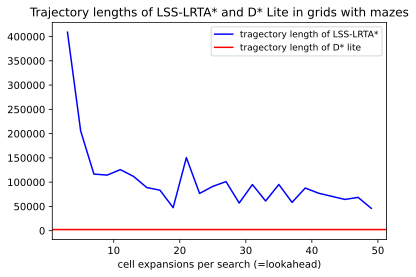

In [56]:
# put real value!!!
trajectory_length_D_star_lite = mazes_result['Trajectory_length'].mean() * 10

plt.plot(lookaheads, mazes_results['Trajectory_length'],
        color='blue',
        label = 'tragectory length of LSS-LRTA*')
plt.axhline(y=trajectory_length_D_star_lite, linestyle='-',
        color='red',
        label='tragectory length of D* lite')
plt.xlabel('cell expansions per search (=lookahead)')
plt.title('Trajectory lengths of LSS-LRTA* and D* Lite in grids with mazes')
plt.legend(fontsize=9)
plt.savefig(path_to_docs + 'trajectory_length_for_mazes.png')
plt.show()